The most abundant gender in the company is Male
Gender Distribution:
Gender
Male      882
Female    588
Name: count, dtype: int64
The department with low diversity in terms of male-female ratio is Human Resources
Gender Distribution by Department:
Gender                  Female  Male
Department                          
Human Resources             20    43
Research & Development     379   582
Sales                      189   257


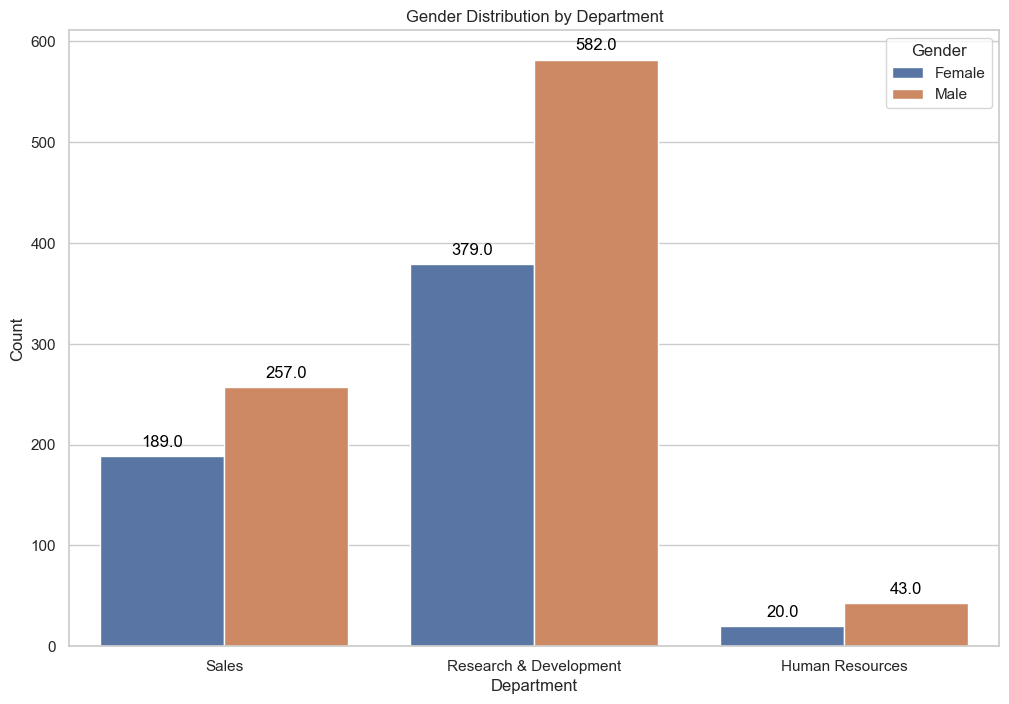

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
                

data = pd.read_csv('emp_attr.csv')

# 1.1 Gender Analysis
gender_counts = data['Gender'].value_counts()
most_abundant_gender = gender_counts.idxmax()
print(f"The most abundant gender in the company is {most_abundant_gender}")
print("Gender Distribution:")
print(gender_counts)

# 1.2 Department Analysis
department_gender_counts = data.groupby('Department')['Gender'].value_counts().unstack()
department_gender_ratios = department_gender_counts.div(department_gender_counts.sum(axis=1), axis=0)
low_diversity_department = department_gender_ratios.idxmax(axis=1).idxmax()
print(f"The department with low diversity in terms of male-female ratio is {low_diversity_department}")
print("Gender Distribution by Department:")
print(department_gender_counts)

# 1.3 Observations
# Plotting gender distribution by department with values
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='Department', hue='Gender')

# Display the counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()
